In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Furniture Price Prediction.csv')

In [3]:
df


,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


In [5]:
df=df.drop('url',axis=1)

In [6]:
df

,furniture,type,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,0.0,172.14,9%,8495.0


In [7]:
df.isnull().sum()

furniture     0
type          0
rate          0
delivery      0
sale          0
price        39
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df['sale'] = df['sale'].str.rstrip('%').astype('float') / 100.0

<ipython-input-9-07907b5c3889>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sale'] = df['sale'].str.rstrip('%').astype('float') / 100.0


In [10]:
df.describe()

,rate,delivery,sale,price
count,1961.000000,1961.000000,1961.000000,1961.000000
mean,0.749567,141.282963,0.234431,2910.418195
std,1.618916,137.392050,0.208811,4002.917206
min,0.000000,10.830000,0.000000,13.400000
25%,0.000000,52.440000,0.000000,740.000000
50%,0.000000,172.140000,0.170000,1900.000000
75%,0.000000,172.140000,0.400000,4000.000000
max,5.000000,2409.900000,0.900000,55000.000000


In [11]:
for i in df.columns:
     print(f"{i:15}: {df[i].nunique()} unique values")

furniture      : 1191 unique values
type           : 584 unique values
rate           : 25 unique values
delivery       : 307 unique values
sale           : 81 unique values
price          : 693 unique values


<Figure size 1200x500 with 0 Axes>

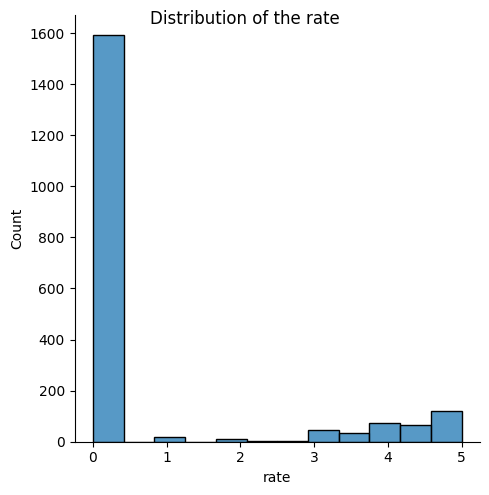

In [12]:
plt.figure(figsize=(12, 5))
sns.displot(df['rate'])
plt.suptitle("Distribution of the rate")
plt.show()

<ipython-input-13-bde403658f10>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['delivery'],color='b', shade=True)


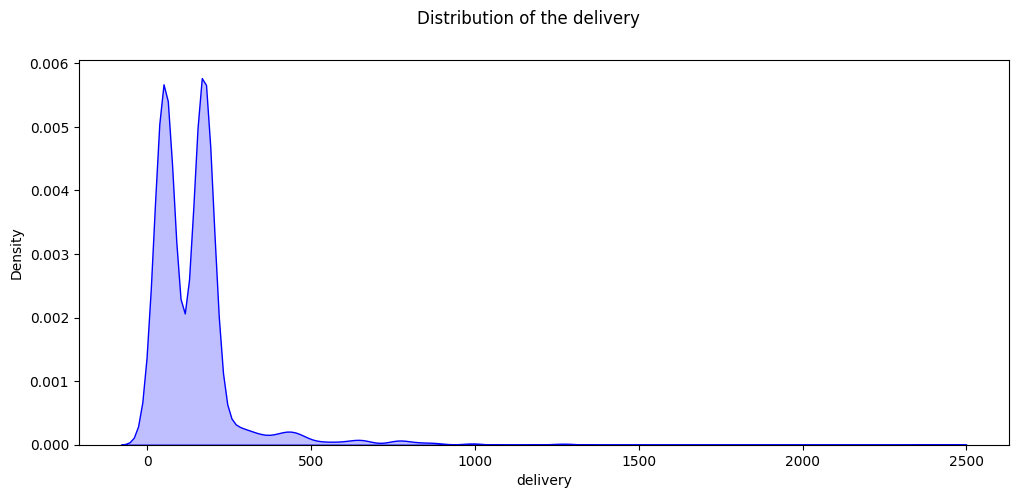

In [13]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df['delivery'],color='b', shade=True)
plt.suptitle("Distribution of the delivery")
plt.show()

<ipython-input-14-fb376b3ef074>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

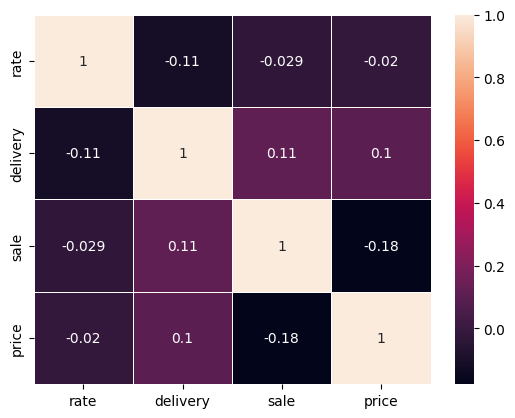

In [14]:
corr=df.corr()
sns.heatmap(corr,annot=True,linewidth=.5)

In [15]:
furniture_type = df['type'].value_counts()
print(furniture_type)
print(len(furniture_type))

Modern Home                                                           670
Rango                                                                  81
Marfy Touch                                                            57
General                                                                51
Artistico                                                              44
                                                                     ... 
Elastic Electric Gaming Chair Covers Household Office                   1
Modern Home R        PCS                                                1
Epoch Sylvanian Families Ka     Shining room light                      1
Sprayer model coloring  art drawing                                     1
Casio Standard Analogue Ladys Standard Analog Women s LTP V   G  A      1
Name: type, Length: 584, dtype: int64
584


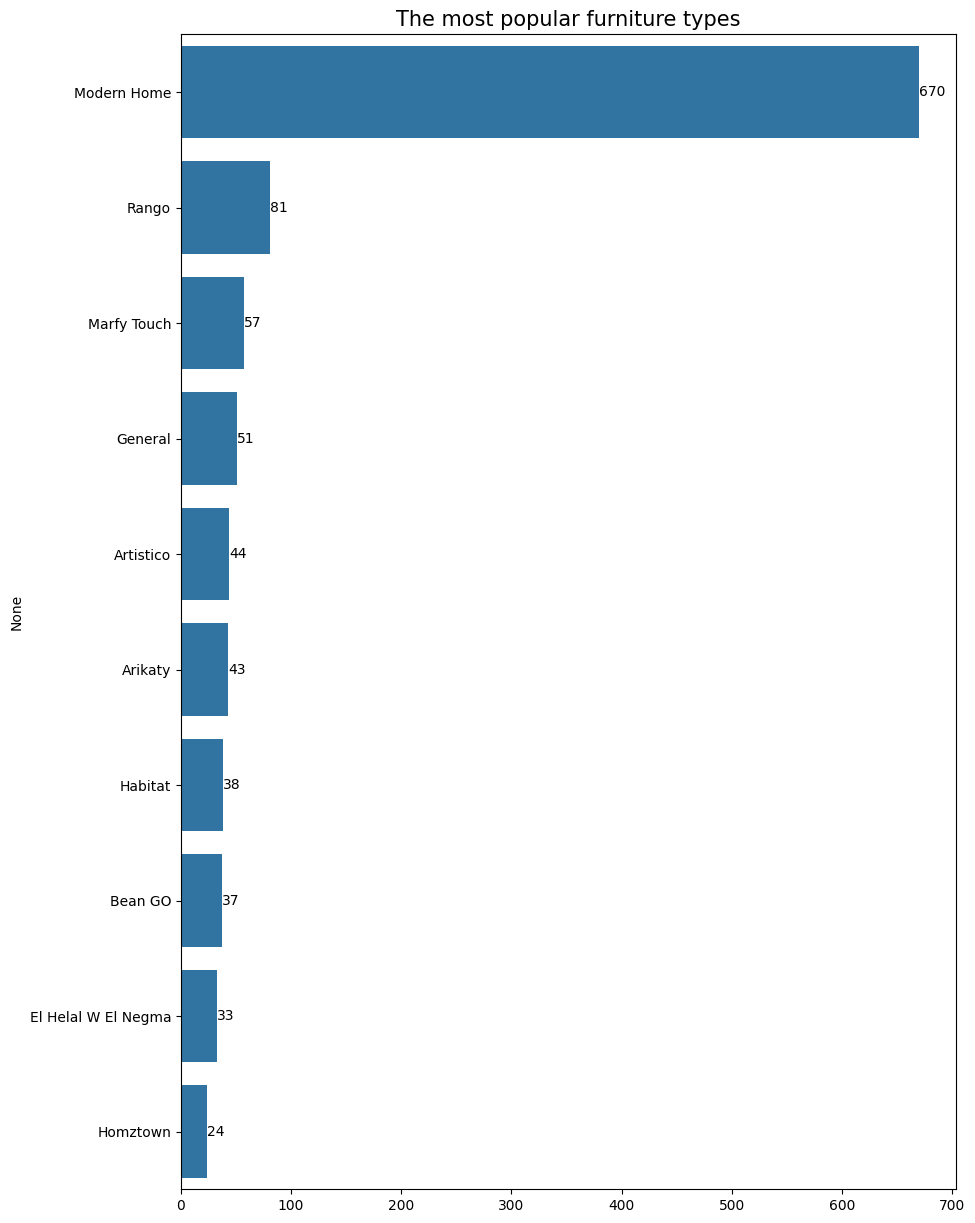

In [16]:
plt.figure(figsize=(10,15))
ax = sns.barplot(y = furniture_type.index[:10], x = furniture_type.values[:10])
for i in ax.containers:
    ax.bar_label(i,)
plt.title("The most popular furniture types", size=15)
plt.show()

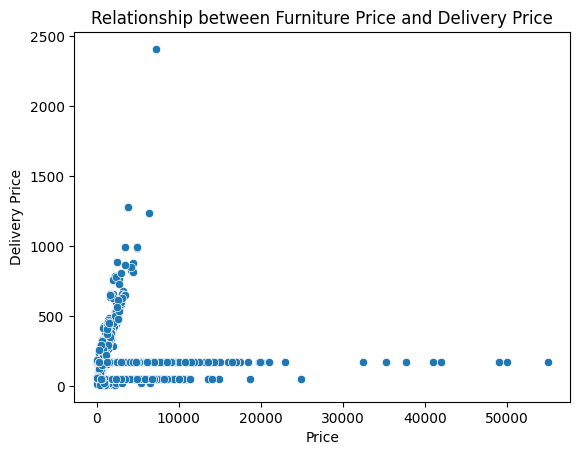

In [17]:
sns.scatterplot(x='price', y='delivery', data=df)
plt.xlabel('Price')
plt.ylabel('Delivery Price')
plt.title('Relationship between Furniture Price and Delivery Price')
plt.show()
